In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parsing

In [2]:
with open("data/input10.txt") as f:
    data = f.read().rstrip("\n")

ls = [[c for c in l] for l in data.split("\n")]

startpos = (0,0)
pipes = ["|", "-", "L", "J", "7", "F"]
for i in range(len(ls)):
    for j in range(len(ls[0])):
        if ls[i][j] == "S":
            startpos = (i,j)
            break

# Part 1

In [3]:
def get_curdir(curdir, curpipe):
    if curpipe=="|":
        pass
    elif curpipe=="-":
        pass
    elif curpipe=="L":
        if curdir==(1,0):
            curdir = (0,1)
        elif curdir==(0,-1):
            curdir = (-1,0)
    elif curpipe=="J":
        if curdir==(1,0):
            curdir = (0,-1)
        elif curdir==(0,1):
            curdir = (-1,0)
    elif curpipe=="7":
        if curdir==(0,1):
            curdir = (1,0)
        elif curdir==(-1,0):
            curdir = (0,-1)
    elif curpipe=="F":
        if curdir==(-1,0):
            curdir = (0,1)
        elif curdir==(0,-1):
            curdir = (1,0)
    return curdir

history = []
curpipe = ""
curdir = (0,1)
curpos = startpos
while curpipe!="S":
    history.append(curpipe)
    curdir = get_curdir(curdir, curpipe)
    curpipe = ls[curpos[0]+curdir[0]][curpos[1]+curdir[1]]
    curpos = (curpos[0] + curdir[0], curpos[1] + curdir[1])
int(len(history)/2)

6812

# Part 2

In [4]:
def turn_right(curdir):
    if curdir==(0,1):
        return (1,0)
    if curdir==(0,-1):
        return (-1,0)
    if curdir==(1,0):
        return (0,-1)
    if curdir==(-1,0):
        return (0,1)

history = []
curpipe = ""
curdir = (0,1)
curpos = startpos
occup = np.zeros((len(ls), len(ls[0])))
while curpipe!="S":
    occup[curpos[0],curpos[1]] = 1
    history.append(curpipe)
    curdir = get_curdir(curdir, curpipe)
    curpipe = ls[curpos[0]+curdir[0]][curpos[1]+curdir[1]]
    curpos = (curpos[0] + curdir[0], curpos[1] + curdir[1])

curpos = startpos
toright = set()
curpipe = ""
curdir = (-1,0)
poshist = [[],[]]
iters = 0
while curpipe!="S":
    poshist[0].append(curpos[0])
    poshist[1].append(curpos[1])
    rightdir1 = turn_right(curdir)
    right1 = (curpos[0] + rightdir1[0], curpos[1] + rightdir1[1])
    curdir = get_curdir(curdir, curpipe)
    rightdir2 = turn_right(curdir)
    right2 = (curpos[0] + rightdir2[0], curpos[1] + rightdir2[1])
    for r in [right1, right2]:
        if not occup[r[0], r[1]]:
            toright.add(r)
            occup[r[0], r[1]] = 2
    occup[curpos[0],curpos[1]] = 500 + iters
    iters += 1
    curpipe = ls[curpos[0]+curdir[0]][curpos[1]+curdir[1]]
    curpos = (curpos[0] + curdir[0], curpos[1] + curdir[1])

# Rest of inside points are in the range 35:105, no need for more general approach
nins = len(toright)
nins += (occup[35:105,35:105]==0).sum()
print(nins)

# Make cool plot
occup[occup==2] = iters + 3000
for i in range(35,105):
    for j in range(35,105):
        if occup[i,j]==0:
            occup[i,j] = iters + 3000

527


# Overkill

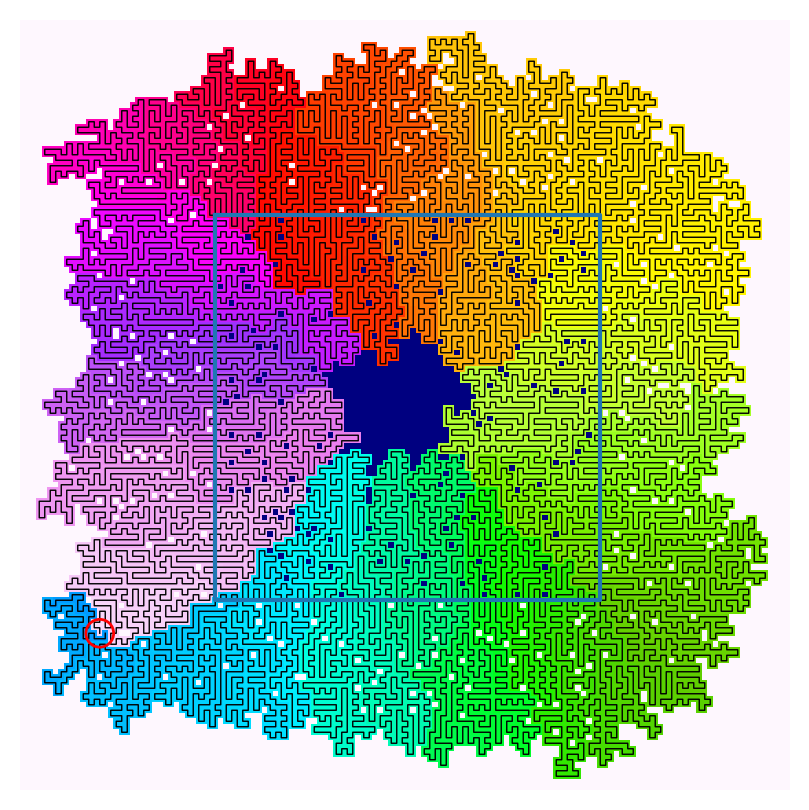

In [5]:
fig, ax = plt.subplots(figsize=(5,5), dpi=200)
ax.imshow(-occup, cmap="gist_ncar")
plt.plot(poshist[1], poshist[0], c="k", linewidth=0.5)
plt.scatter([startpos[1]], [startpos[0]], s=100, facecolors='none', edgecolors='r', zorder=100)
p1,p2 = 35,105
plt.plot([p1,p2,p2,p1,p1], [p1,p1,p2,p2,p1])
plt.axis('off')
plt.show()